***Authors: Jarod Carroll, Timothy Cummins, Luis Labra***

***Date: 02/14/2020***

## **A Look at Opportunity Youth in 2017**

**Data Source: https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_pwa.zip**

## **Methodology**

1. Data Acquisition
    * Get the PUMA data
    * Filter only Youth in a desired PUMA range
2. Data Analysis
    * Get the data into seperate groups
    * Find the total number of represented people in the groups
3. Compare
    * Find the 2016 data
    * Find the data on page 9
    * Graph this data against the 2017 data
4. Figure Creation
    * Save the data tables and graphs that give relevent information

**Import Packages**

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.data_acquisition import *
from src.data_formating import *
from src.make_2016_tables import *
from src.multi_bar_grapher import *
from src.make_figures import *

### **Data Acquisition**
This will get the data from the internet. Only needs to be run once.

In [3]:
#data_collection.download_data_and_load_into_sql()

Gets youth from the desired PUMA range using the database that was created from the line above.

In [4]:
total_youth_unweighted = get_youth_by_puma(start_puma = 11610, end_puma = 11615, dbname = 'opportunity_youth')

This will get give the number of opportunity youth in each of the PUMA regions.

In [5]:
get_oy_by_puma(start_puma = 11610, end_puma = 11615, dbname = 'opportunity_youth')

,puma,totalpeople
0,11610,1853.0
1,11611,2038.0
2,11612,1977.0
3,11613,2006.0
4,11614,1530.0
5,11615,1210.0


## **Data Analysis**

First we want to create tables that are like the ones found on the 2016 documnet with similar analysis.

PDF of 2016 document: https://roadmapproject.org/wp-content/uploads/2018/09/Opportunity-Youth-2016-Data-Brief-v2.pdf

This can be done by a method in the src folder that was made. It returns all the tables as seperate variables.

In [6]:
four_race, age, education, all_races = page_2_tables(total_youth_unweighted, save = True) # all breakups as df

To look at a table we can just call the variable

In [7]:
age

,,16-18,,19-21,,22-24,,Total
Total,100%,30141,100%,25486,100%,30256,100%,85883
Oy,6%,1815,15%,3902,16%,4897,12%,10614
Working Without A Diploma,1%,449,5%,1400,5%,1631,4%,3480
Not Oy,92%,27877,79%,20184,78%,23728,84%,71789


## **Compare to 2016 data**

First we have to get the 2016 data from the PDF. The PDF is in the references folder and the data is fetched and reformated to match the tables that were made for 2017.

In [8]:
four_race_2016, age_2016, edu_2016 = get_2016_tables(save = True)

Once again we can look at the tables by calling the variable.

In [9]:
age_2016

,,16-18,,19-21,,22-24,,Total
Total,100%,50053,100%,41651,100%,48043,100%,139735
Oy,6%,2805,17%,7284,18%,8728,13%,18817
Working Without A Diploma,1%,587,5%,2049,6%,2877,4%,5513
Not Oy,93%,46661,78%,32318,76%,36426,83%,115405


## **Graphing**

A bar graph can be made by plotting both the 2016 data and the 2017 data on the same axes.

A function in multi_bar_grapher in src will allow for the graphing of this.

The methods make multiple axes that will differ by the rows they are graphing or the columns (based on the method called).

It graphs the percentages so they are normalized.

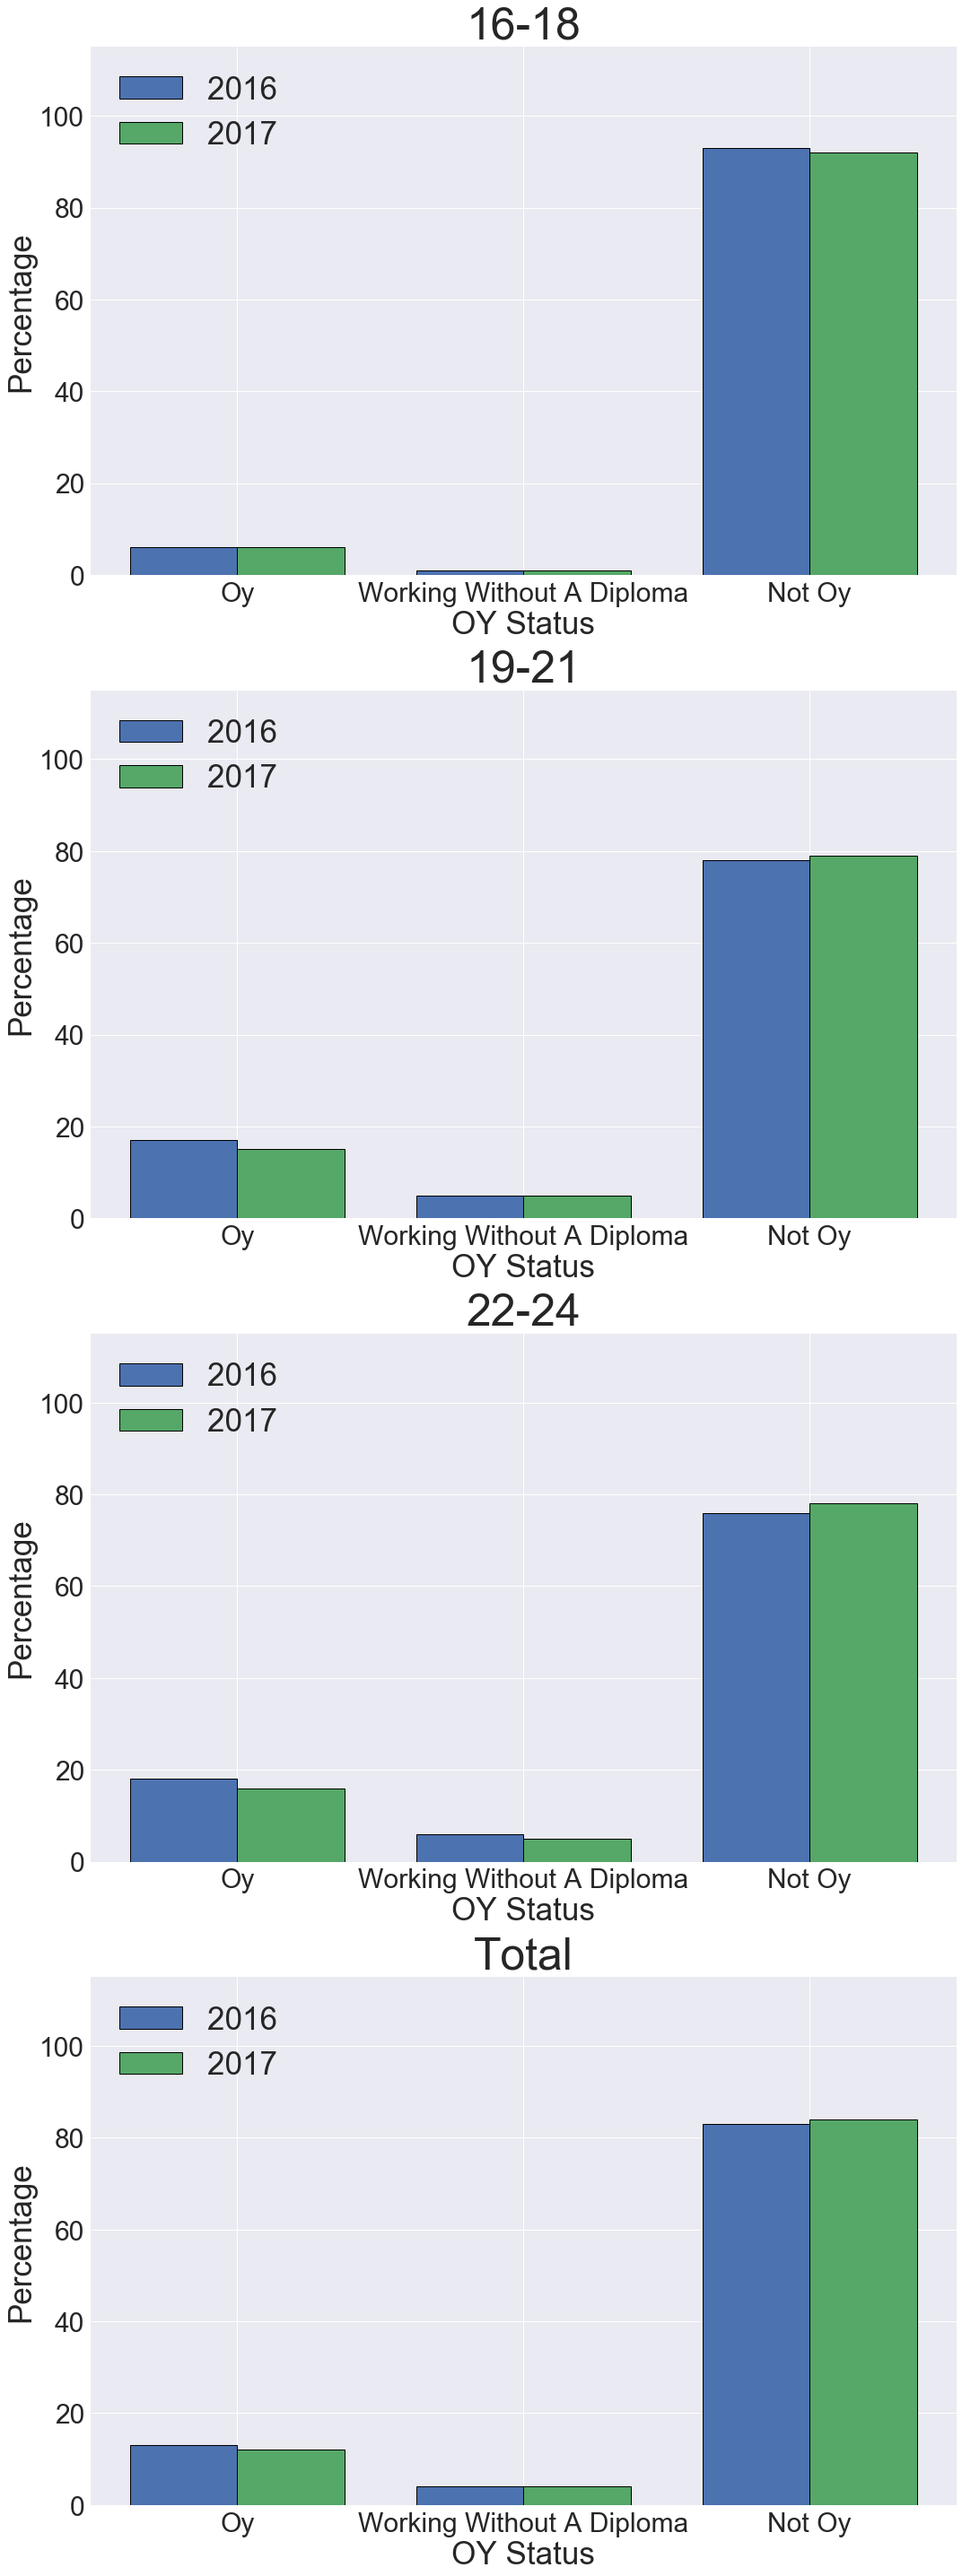

In [10]:
fig, axes = graph_compare_percents_cols([age_2016, age], ['2016', '2017'], 'OY Status')

If we just want one axis we can isolate it with another method in the multi_bar_grapher.

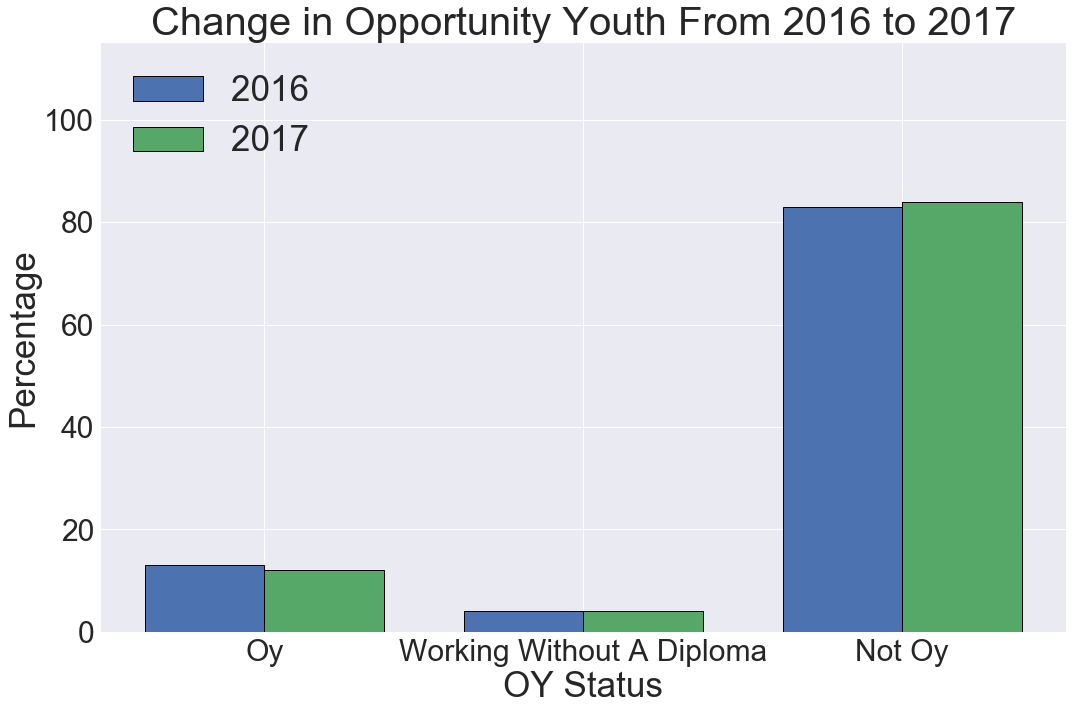

In [11]:
display_one_axis(fig, axes, 3, title = 'Change in Opportunity Youth From 2016 to 2017')

## **Creating Figures in Reports**

Giving this method a save name will save the figures file in reports instead of showing it

In [28]:
#display_one_axis(fig, axes, 3, title = 'Change in Opportunity Youth From 2016 to 2017', save_name = '../reports/figures/oy_change_2016_2017.png')